In [48]:
from shapely.geometry import MultiPolygon, Polygon, mapping, shape
import json
from shapely.geometry import shape, mapping
from shapely.ops import unary_union
import os
import csv
from shapely.ops import transform
from pyproj import Transformer
import json


In [49]:
file = "..\\rawData\\countries.geoJson"

with open(file, 'r') as f:
    data = json.load(f)

In [50]:
len(data['features'])

258

In [ ]:
file = "../rawData/countries.geoJson"
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)

with open(file, 'r') as f:
    data = json.load(f)


In [ ]:
# MISSING ISOs

missingIso = {
    "France": "FRA",
    "Somaliland": "SOM",
    "Kosovo": "KOS",
}

# replace -99 with corresponding name
for feature in data['features']:
    if feature['properties']['name'] in missingIso:
        feature['properties']['ISO3166-1-Alpha-3'] = missingIso[feature['properties']['name']]

In [ ]:

tolerance = 0
tol_str = str(tolerance).replace('.', '_')
normalize = True
scale_factor = 100000

crs = "EPSG:3857"
if crs == "EPSG:3857":
    crs_path = "WebMercator"
else:
    crs_path = "WGS84"

# output_dir = "../processedData/test"
output_dir = f'../processedData/{crs_path}/tol{tol_str}_scale{scale_factor}'

def scale_coords(x, y, z=None):
    return x / scale_factor, y / scale_factor

# --- LOAD DATA ---
with open(file, 'r') as f:
    data = json.load(f)

# --- TRANSFORMER (WGS84 -> Web Mercator) ---
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)

for idx in range(len(data['features'])):
# for idx in range(3):
    # Exclude Antarctica
    if data['features'][idx]['properties']['ISO3166-1-Alpha-3'] == "ATA":
        continue

        # Process the feature
    feature = data['features'][idx]
    iso3 = feature['properties']['ISO3166-1-Alpha-3']
    geometry = shape(feature['geometry'])
    geometry = transform(transformer.transform, geometry)
    geometry = transform(scale_coords, geometry)               # Apply scaling
    geometry = geometry.simplify(tolerance, preserve_topology=True)

    # --- Make polygons iterable ---
    if isinstance(geometry, Polygon):
        polygons = [geometry]
    elif isinstance(geometry, MultiPolygon):
        polygons = list(geometry.geoms)
    else:
        raise TypeError(f"Unsupported geometry type: {geometry.geom_type}")

    outline_coords = []

    for polygon in polygons:
        outline = polygon.boundary
        lines = outline.geoms if outline.geom_type == 'MultiLineString' else [outline]
        for line in lines:
            coords = list(line.coords)
            outline_coords.append(coords)
    print(f"[✓] Processed {iso3} with {len(outline_coords)} outlines")
   

    os.makedirs(output_dir, exist_ok=True)
    out_path = os.path.join(output_dir, f"{iso3}.json")

    with open(out_path, 'w') as f_out:
        json.dump({"coordinates": outline_coords}, f_out)

    print(f"[✓] Saved {iso3} to {out_path}")

[✓] Processed IDN with 264 outlines
[✓] Saved IDN to ../processedData/WebMercator/tol0\IDN.json
[✓] Processed MYS with 17 outlines
[✓] Saved MYS to ../processedData/WebMercator/tol0\MYS.json
[✓] Processed CHL with 163 outlines
[✓] Saved CHL to ../processedData/WebMercator/tol0\CHL.json
[✓] Processed BOL with 1 outlines
[✓] Saved BOL to ../processedData/WebMercator/tol0\BOL.json
[✓] Processed PER with 5 outlines
[✓] Saved PER to ../processedData/WebMercator/tol0\PER.json
[✓] Processed ARG with 8 outlines
[✓] Saved ARG to ../processedData/WebMercator/tol0\ARG.json
[✓] Processed -99 with 2 outlines
[✓] Saved -99 to ../processedData/WebMercator/tol0\-99.json
[✓] Processed CYP with 4 outlines
[✓] Saved CYP to ../processedData/WebMercator/tol0\CYP.json
[✓] Processed IND with 35 outlines
[✓] Saved IND to ../processedData/WebMercator/tol0\IND.json
[✓] Processed CHN with 70 outlines
[✓] Saved CHN to ../processedData/WebMercator/tol0\CHN.json
[✓] Processed ISR with 1 outlines
[✓] Saved ISR to ..

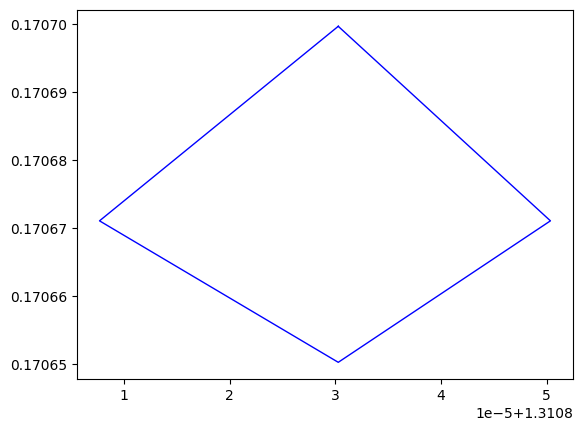

In [ ]:
# plot the outlines
outline_coords

import matplotlib.pyplot as plt
from shapely.geometry import LineString
for coords in outline_coords:
    line = LineString(coords)
    x, y = line.xy
    plt.plot(x, y, color='blue', linewidth=1)

Processing -99.json...
Processing ABW.json...
Processing AFG.json...
Processing AGO.json...
Processing AIA.json...
Processing ALA.json...
Processing ALB.json...
Processing AND.json...
Processing ARE.json...
Processing ARG.json...
Processing ARM.json...
Processing ASM.json...
Processing ATF.json...
Processing ATG.json...
Processing AUS.json...
Processing AUT.json...
Processing AZE.json...
Processing BDI.json...
Processing BEL.json...
Processing BEN.json...
Processing BFA.json...
Processing BGD.json...
Processing BGR.json...
Processing BHR.json...
Processing BHS.json...
Processing BIH.json...
Processing BLM.json...
Processing BLR.json...
Processing BLZ.json...
Processing BMU.json...
Processing BOL.json...
Processing BRA.json...
Processing BRB.json...
Processing BRN.json...
Processing BTN.json...
Processing BWA.json...
Processing CAF.json...
Processing CAN.json...
Processing CHE.json...
Processing CHL.json...
Processing CHN.json...
Processing CIV.json...
Processing CMR.json...
Processing 

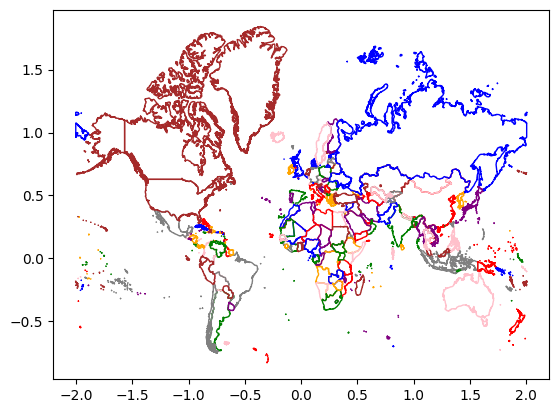

In [54]:
# plot all json 
path = "../processedData/WebMercator/tol0"

import matplotlib.pyplot as plt 
import json
import os
color = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray']

# plot all files in path 
files = [f for f in os.listdir(path) if f.endswith('.json')]
files
for i, file in enumerate(files):
    print(f"Processing {file}...")
    with open(os.path.join(path, file), 'r') as f:
        data = json.load(f)
    coords = data['coordinates']
    for coord in coords:
        line = LineString(coord)
        x, y = line.xy
        plt.plot(x, y, color=color[i % len(color)], linewidth=1)


